# Week Four - Part 2 - Assignment High Frequency Words

Group Member: Bryan Persaud, Matthew Baker, Zhi Ying Chen

Please answer the following questions in an IPython Notebook, posted to GitHub.
1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

# Load Packages

In [1]:
!pip install autocorrect

  Created wheel for autocorrect: filename=autocorrect-2.5.0-cp37-none-any.whl size=621861 sha256=49c37faf409f93ee7fa716cc56ed86624258ec64bf5e614d694ce328e4a2fe93
  Stored in directory: C:\Users\Bryan\AppData\Local\pip\Cache\wheels\1f\71\da\4a15028d25fbd5fb97fb76c5f76f0ad86f0caa69394dd7cfa7
Successfully built autocorrect


First we load in the necessary packages. Matplotlib is used for the figures and graphs made. Pandas is used to create any dataframes from the data being used. The nltk package is used to load in the data and also used to answer some of the questions.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import nltk
from nltk.corpus import gutenberg
import spacy
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from autocorrect import Speller
# from google.colab import drive 

In [5]:
#download the corpus and the stopwords
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# 1. Choose a corpus of interest

For the chosen corpus we will be selecting one from the Gutenberg library that is available within the nltk package. The exact corpus chosen is Macbeth by Shakespeare.

In [6]:
macbeth = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')
print(macbeth)

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]


From the Gutenberg library we load in a text file that contains Macbeth by Shakespeare.

# 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

In [7]:
len(macbeth)

23140

We see that there are 23140 words in Macbeth. These are all the words in Macbeth so from here let's see how many unique words there are.

In [8]:
len(set(macbeth))

4017

In [9]:
type(macbeth)

nltk.corpus.reader.util.StreamBackedCorpusView

There are 4017 unique words in Macbeth.

# 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [10]:
# Get unique words and store them in a list
words = nltk.FreqDist(macbeth)
unique_words = words.most_common()

In [11]:
i = 0
half = [] # Empty list to store unique words
for word in unique_words:
    if i >= len(macbeth) / 2: # Go through half of the total words
        break
    else:
        i = i + word[1]
        half.append(word)
len(half)        

65

There are 65 unique words that represent half of the total words in the corpus.

# 4. Identify the 200 highest frequency words in this corpus.

In [12]:
frequency_words = words.most_common(200) # Top 200 words
df = pd.DataFrame(frequency_words, columns = ['Word', 'Count']) # Dataframe to show words
df['Word'] = df['Word'].astype(str)

#stopwords dataframe
stop = stopwords.words('english')
stop_df=DataFrame(stop,columns=['Word'])

#words dataframe
go = set(nltk.corpus.words.words())
go_df = DataFrame(go,columns=['Word'])

df.Word = df.Word.str.replace(' ', '')
# df.Word.str.replace('[^a-zA-Z]', '')


df2 = df
df2['Word'] = df['Word'].str.replace(r'[^\w\s]+', '')



nan_value = float("NaN")
df2.replace("", nan_value, inplace=True)
df2.dropna(subset = ["Word"], inplace=True)
df2.Word = [x.lower() for x in df2.Word]
cond = df2['Word'].isin(stop_df['Word'])
df2.drop(df2[cond].index, inplace = True)

df2 = pd.merge(df2,go_df)
df2 = df2.drop_duplicates(subset=['Word'], keep='first')


df2.head(200) # Display top to words in dataframe


,Word,Count
0,enter,80
1,thou,63
3,thee,61
4,king,55
5,th,51
6,yet,50
7,shall,48
9,lady,48
10,thy,46
11,st,42


It turns out Macbeth is a really tough dataset to use a frequency count on, because the stop word list in NLTK is based on modern english.  Additionally it appears with words such as "vpon" which should read "upon" that there is a transcription error from the original text

In [13]:
stop = stopwords.words('english')
stop_df=DataFrame(stop,columns=['Word'])
stop_df.head(10)

,Word
0,i
1,me
2,my
3,myself
4,we
5,our
6,ours
7,ourselves
8,you
9,you're


In [14]:
df.tail(10) # Display last ten words in dataframe

,Word,Count
185,still,17
186,heere,17
187,sey,17
188,looke,16
190,call,16
192,owne,16
193,take,16
194,sleepe,16
195,father,16
196,men,15


# 5. Create a graph that shows the relative frequency of these 200 words.

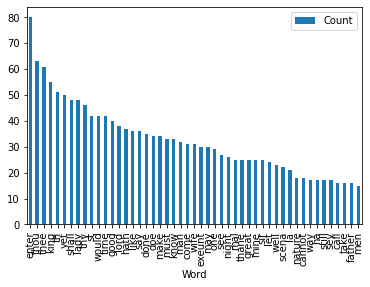

In [15]:
#"ye olde" vocab filtered out
df2.plot.bar(x='Word', y='Count')

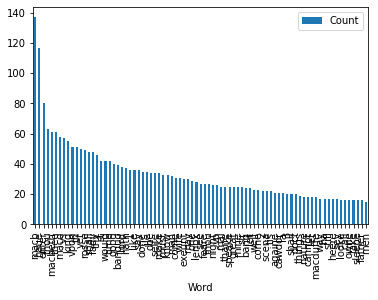

In [16]:
#unfiltered for "ye olde" vocab
df.plot.bar(x='Word', y='Count')

# 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

###"Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table."

###In our dataset the frequency of the words is inversely proportional (however not directly).  That is, we do not see the expected frequency drop of the second word occuring half as often as the first word.  However, as the visuals show, the measured word frequencies have been filtered to match a set of common english words in an attempt to filter out Named Entities.

# 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


###This particular word frequency list is probably much different than all words in all corpora because it is a very old text.  As language and technology have improved the documents which have been converted into massive word corpora likely skew to newer vocabulary which changes over time.  

#Video

[Video Description of Code](https://youtu.be/yyg9nCuGQGk)